In [113]:
# K Means Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

<bound method DataFrame.count of         attr1      attr2  cluster
0   -6.428571  -7.784725        0
1    1.138598   1.839405        3
2    0.285980  -3.313499        2
3    5.082734  -3.334183        1
4    0.854200 -10.567261        0
..        ...        ...      ...
495  6.801513  -4.724746        1
496  1.605694  -4.317907        2
497  1.107768   4.773266        3
498 -1.075868  -7.556290        0
499  6.325713  -4.985838        1

[500 rows x 3 columns]>


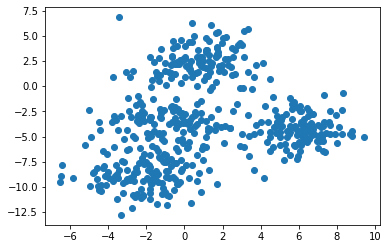

[133, 457, 460, 286]


In [114]:
# Initialization
df = pd.read_excel('C:/Users/shubh/Downloads/clustering.data.xlsx')
K=4
print(df.count)
N=500 
# initial scatter plot
plt.scatter(df["attr1"], df["attr2"])
plt.show()

# coordinates dictionary
col1 =df["attr1"].values.tolist()
col2 = df["attr2"].values.tolist()
coordict = {}

for i in range(N):
    coordict[i] = [col1[i],col2[i]]
# print(coordict)

# random cluster initial points
# c1=random.randint(0,N-1)
# c2=random.randint(0,N-1)
# c3=random.randint(0,N-1)
# c4=random.randint(0,N-1)
initial_cluster_keys = []
# since my dictionary keys range from 0 to 499, random initial keys should be 0<=random int<=499
for i in range(K):
    initial_cluster_keys.append(random.randint(0,N-1))
print(initial_cluster_keys)

In [115]:
# Assignment Stage
# n represents each point
nearest_cluster = []
for n in coordict:
    centroids =[]
    for centroid in initial_cluster_keys:
        euc_dist = pow(((pow((coordict[n][0]-coordict[centroid][0]),2)) + (pow((coordict[n][1]-coordict[centroid][1]),2))), 0.5)
        centroids.append(euc_dist)
    # print("smallest distance between point n and this centroid is", min(centroids))
    # print("index of this value is", index.euc_dist(min(centroids)))
    # print(centroids)
    # print("this point is closest to centroid no. ", centroids.index(min(centroids)))
    nearest_cluster.append(centroids.index(min(centroids)))
print(len(nearest_cluster))
df["nearest_cluster"]= nearest_cluster
print(df)

500
        attr1      attr2  cluster  nearest_cluster
0   -6.428571  -7.784725        0                2
1    1.138598   1.839405        3                3
2    0.285980  -3.313499        2                1
3    5.082734  -3.334183        1                1
4    0.854200 -10.567261        0                2
..        ...        ...      ...              ...
495  6.801513  -4.724746        1                1
496  1.605694  -4.317907        2                1
497  1.107768   4.773266        3                3
498 -1.075868  -7.556290        0                2
499  6.325713  -4.985838        1                1

[500 rows x 4 columns]


In [116]:
# Update centroid - re-calculate the new centroid for each cluster
def updatecenter():
    new_dict = {}
    for i in range(K):
        x=np.mean(df[df['nearest_cluster'] == i]['attr1'])
        y=np.mean(df[df['nearest_cluster'] == i]['attr2'])
        new_dict[i] = x,y
    print(new_dict)
    return new_dict

In [117]:
# iterate the allocation of clusters
def iteration(centers):
    nearest_center =[]
    for n in coordict:
        euclidian_distances =[]
        for key in centers:
            euc_dist_ = pow(((pow((coordict[n][0]-centers[key][0]),2)) + (pow((coordict[n][1]-centers[key][1]),2))), 0.5)
            euclidian_distances.append(euc_dist_)
        nearest_center.append(euclidian_distances.index(min(euclidian_distances)))
    df["nearest_cluster"]= nearest_center
    print(df)
    return df

In [118]:
while True:
    nearest_cluster_copy = df['nearest_cluster'].copy(deep=True)
    centers = updatecenter()
    df1 = iteration(centers)
    if nearest_cluster_copy.equals(df1['nearest_cluster']):
        break

{0: (3.1988515397777784, 2.514364237888889), 1: (4.009489389113407, -4.070985321427833), 2: (-2.188812746754386, -7.707009674216375), 3: (0.19259911214529912, 2.2068726402905985)}
        attr1      attr2  cluster  nearest_cluster
0   -6.428571  -7.784725        0                2
1    1.138598   1.839405        3                3
2    0.285980  -3.313499        2                1
3    5.082734  -3.334183        1                1
4    0.854200 -10.567261        0                2
..        ...        ...      ...              ...
495  6.801513  -4.724746        1                1
496  1.605694  -4.317907        2                1
497  1.107768   4.773266        3                3
498 -1.075868  -7.556290        0                2
499  6.325713  -4.985838        1                1

[500 rows x 4 columns]
{0: (2.4858134403414627, 2.873855233756098), 1: (4.725058072410719, -4.178481878249999), 2: (-2.056653346010638, -7.378161549292556), 3: (-0.24669798581553412, 1.6217874832718442)}
   

In [119]:
print("finalized dataframe")
print(df1)

finalized dataframe
        attr1      attr2  cluster  nearest_cluster
0   -6.428571  -7.784725        0                2
1    1.138598   1.839405        3                0
2    0.285980  -3.313499        2                3
3    5.082734  -3.334183        1                1
4    0.854200 -10.567261        0                2
..        ...        ...      ...              ...
495  6.801513  -4.724746        1                1
496  1.605694  -4.317907        2                3
497  1.107768   4.773266        3                0
498 -1.075868  -7.556290        0                2
499  6.325713  -4.985838        1                1

[500 rows x 4 columns]


In [120]:
# PART 2
#colormap = {0: 'r', 1: 'g', 2: 'b', 3: 'y'}
color =[]
for pos in range(len(df1)):
    color.append('k')
df1["color"] = color
print(df1)    

        attr1      attr2  cluster  nearest_cluster color
0   -6.428571  -7.784725        0                2     k
1    1.138598   1.839405        3                0     k
2    0.285980  -3.313499        2                3     k
3    5.082734  -3.334183        1                1     k
4    0.854200 -10.567261        0                2     k
..        ...        ...      ...              ...   ...
495  6.801513  -4.724746        1                1     k
496  1.605694  -4.317907        2                3     k
497  1.107768   4.773266        3                0     k
498 -1.075868  -7.556290        0                2     k
499  6.325713  -4.985838        1                1     k

[500 rows x 5 columns]


        attr1      attr2  cluster  nearest_cluster color
0   -6.428571  -7.784725        0                2     g
1    1.138598   1.839405        3                0     r
2    0.285980  -3.313499        2                3     y
3    5.082734  -3.334183        1                1     b
4    0.854200 -10.567261        0                2     g
..        ...        ...      ...              ...   ...
495  6.801513  -4.724746        1                1     b
496  1.605694  -4.317907        2                3     y
497  1.107768   4.773266        3                0     r
498 -1.075868  -7.556290        0                2     g
499  6.325713  -4.985838        1                1     b

[500 rows x 5 columns]


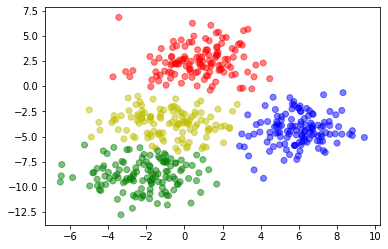

In [121]:
for pos in range(len(df1)):
    if df1.loc[pos, "nearest_cluster"]==0:
        df1.loc[pos, "color"]='r'
    elif df1.loc[pos, "nearest_cluster"]==1:
        df1.loc[pos, "color"]='b'
    elif df1.loc[pos, "nearest_cluster"]==2:
        df1.loc[pos, "color"]='g'
    elif df1.loc[pos, "nearest_cluster"]==3:
        df1.loc[pos, "color"]='y'
    else:
        print("NA")
print(df1)
#fig = plt.figure(figsize=(5, 5))
plt.scatter(df1['attr1'], df1['attr2'], color=df1['color'], alpha=0.5)
plt.show()

In [122]:
#PART 3
#accuracy of this clustering algo
match = 0
for ind in range(len(df1)):
    if(df1.loc[ind, "cluster"])==(df1.loc[ind, "nearest_cluster"]):
        match = match + 1
    else:
        continue
accuracy = (match/len(df1))*100
print(accuracy)

# reporting the estimated centroids of the four estimated clusters
print(centers)



27.0
{0: (0.7632523766535433, 2.4866030128267713), 1: (5.972836129692918, -4.342187054362203), 2: (-2.142633249429687, -8.863608271023438), 3: (-0.8267694809237288, -3.67801796174576)}


In [123]:
# precision of each cluster

# confusion matrix for cluster evaluation 

print(df1.groupby('cluster').count())
print(df1.groupby('nearest_cluster').count())

confusion_matrix = pd.crosstab(df1['cluster'], df1['nearest_cluster'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
print(type(confusion_matrix))

prec0=119/125
print(prec0)
prec1=124/125
print(prec1)
prec2=110/125
print(prec2)
prec3= 123/125
print(prec3)

         attr1  attr2  nearest_cluster  color
cluster                                      
0          125    125              125    125
1          125    125              125    125
2          125    125              125    125
3          125    125              125    125
                 attr1  attr2  cluster  color
nearest_cluster                              
0                  127    127      127    127
1                  127    127      127    127
2                  128    128      128    128
3                  118    118      118    118
Predicted    0    1    2    3
Actual                       
0            0    1  119    5
1            1  124    0    0
2            3    2    9  111
3          123    0    0    2
<class 'pandas.core.frame.DataFrame'>
0.952
0.992
0.88
0.984


In [124]:
#writing df1 to excel
from pandas import ExcelWriter

writer = ExcelWriter('final.xlsx')
df1.to_excel(writer,'Sheet1')
writer.save()

In [125]:
#reference -https://stackoverflow.com/questions/29459461/dataframe-to-excel-sheet
#https://benalexkeen.com/k-means-clustering-in-python/

In [126]:
#another way to calculate the precision for each cluster
confusion_matrix = pd.crosstab(df1['cluster'], df1['nearest_cluster'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
print(type(confusion_matrix))
idx = pd.IndexSlice
for i in range(K):
    mylist =[]
    for j in range(K):
        mylist.append(confusion_matrix.loc[i, idx[j]])
    print(mylist)
    maximum= max(mylist)
    print(maximum)
    prec=maximum/125
    print("precision for cluster#",i,"is: ",prec)

Predicted    0    1    2    3
Actual                       
0            0    1  119    5
1            1  124    0    0
2            3    2    9  111
3          123    0    0    2
<class 'pandas.core.frame.DataFrame'>
[0, 1, 119, 5]


TypeError: 'numpy.int64' object is not callable